In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *

$x(t) = a(\theta) \cdot s(t) + n(t)$ - модель выходного вектора, где $a(\theta)$ - управляющий вектор, $s(t)$ - сигнал, $n(t)$ - шум. $s(t) \sim N(0, \Gamma)$, $n(t) \sim N(0, \Gamma)$

$$ P_{Bartlett} = \frac{a^H(\theta)\hat{R}a(\theta)}{a^H(\theta)a(\theta)} $$

$$ P_{CAPON}=\frac{1}{a^H(\theta)\hat{R}^{-1}a^H} $$

Для ULA (Uniform Linear Array) управляющий вектор определяется так:
$$
a = [1 \,\,\,\, e^{-2\pi j \frac{d}{\lambda}sin(\theta)} \,\,\,\, ... \,\,\,\, e^{-2\pi j (p-1) \frac{d}{\lambda}sin(\theta)}]
$$
где $j$ - мнимая единица, $d$ - расстояние между датчиками, $p$ - число датчиков, $\theta$ - DOA, $\lambda$ - длина волны.

In [2]:
# Some constants
# d/lambda
dist_ratio = 0.5
Num_sensors = 5
Num_emitters = 2
sample_size = 100
# DOA in degree
theta_degrees = np.array([20, 70])
# DOA in suitable form (radian)
theta = theta_degrees / 180 * np.pi
Gamma_signal = np.array([[2,0],[0,3]])
Gamma_noise = 0.1*np.eye(5, dtype=np.float64)

In [3]:
A = np.zeros((Num_sensors, Num_emitters),dtype=np.complex128)
for i in range(Num_emitters):
    A[:,i] = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors) * np.sin(theta[i]))

In [4]:
A

array([[ 1.        +0.j        ,  1.        +0.j        ],
       [ 0.47618256-0.87934645j, -0.98210585-0.18832978j],
       [-0.54650034-0.83745888j,  0.92906379+0.36991956j],
       [-0.99665042+0.08177982j, -0.8427721 -0.53827054j],
       [-0.40267475+0.91534313j,  0.72631904+0.68735774j]])

In [5]:
s = CN(Num_emitters,sample_size,Gamma_signal)

In [6]:
n = CN(Num_sensors,sample_size,Gamma_noise)

In [7]:
X = np.zeros((sample_size, 5), dtype=np.complex128)
for i in range(sample_size):
    X[i] = A @ s[i] + n[i]
#print(X)

In [8]:
R = space_covariance_matrix(X)

In [9]:
angles = np.linspace(-1*np.pi, np.pi, 1000)
Powers = []
for angle in angles:
    a = steering_vector(dist_ratio, angle, Num_sensors)
    Powers.append(capon_func(a,R).real)

In [10]:
angles[np.argmax(Powers)]*180/np.pi

110.4504504504504

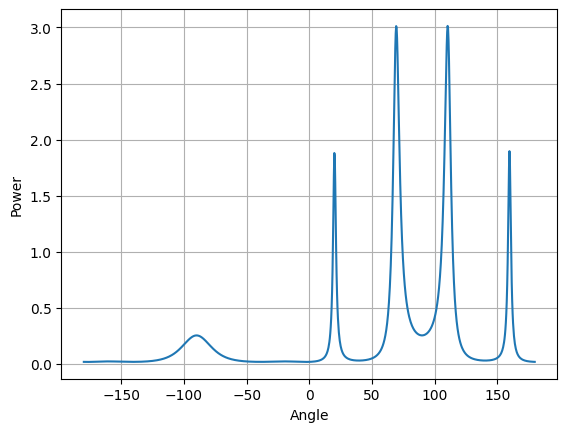

In [11]:
plt.plot(angles*180/np.pi, Powers) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

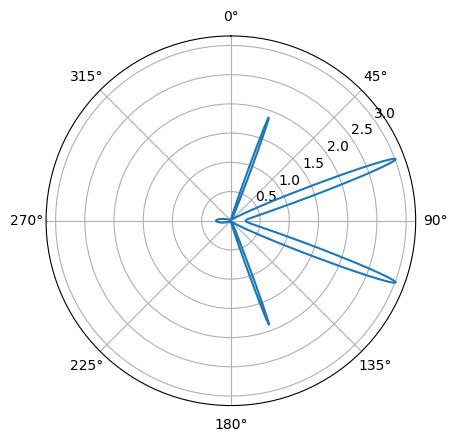

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, Powers) 
ax.set_theta_zero_location('N') 
ax.set_theta_direction(-1) 
ax.set_rlabel_position(55) 
plt.show()